In [1]:
%run jupyterutils.py

from algorithms.supervised.linear_regression.LinearRegression import LinearRegression

### Linear Regression with multiple feature
We attempt to try and mimic linear regression and than test it , to test our implementations correctness we would generate the data set using a perfect linear equation , we will than compare how good our algorithm does when it get's data fitting a curve whose mathematically model is known. Run time and correctness might be good KPI for monitoring .



##### Create data

We'll check how good is the algorithm in finding the actual parameters when we feed it absolutely ideal data

In [2]:
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
y = 9.8 * x1 + 3.2*x2 + 7.6
print("y = ", end='')
sp.pprint(y)


y = 9.8⋅x₁ + 3.2⋅x₂ + 7.6


In [3]:
def ModelEquation(x1,x2):
    return 9.8*x1 + 3.2*x2 + 7.6

In [4]:
total_data_points = 50000
rng = np.random.default_rng(0)             # reproducible
x1 = rng.uniform(0, 2, total_data_points)  # U(0,2)
x2 = rng.uniform(0, 2, total_data_points)  # completely separate draw
y = ModelEquation(x1,x2)

# perm = np.random.permutation(len(x1))
# x1 = x1[perm]
# x2 = x2[perm]
# y = y[perm]


##### Split data

We're going to split the data into training and testing data based on a tuneable parameter

In [5]:
training_percent = 0.85
training_numbers = int(training_percent*total_data_points)

training_features = np.array([x1[:training_numbers],x2[:training_numbers]]).T
training_labels = np.array(y[:training_numbers])

testing_attributes=np.array([x1[training_numbers:],x2[training_numbers:]]).T
testing_labels=np.array(y[training_numbers:])

print(training_features.shape)
print(testing_attributes.shape)
print(training_labels.shape)
print(testing_labels.shape)

(42500, 2)
(7500, 2)
(42500,)
(7500,)


##### Model Training

Iteration  0  weights  [[0.89442036]
 [0.73843234]]  bias  0.0037987698960476554 loss 389.0599142404948


Iteration  1000  weights  [[4.17935394]
 [3.59435831]]  bias  2.8104005964613465 loss 111.31633280233105
Iteration  2000  weights  [[5.97869166]
 [4.99855425]]  bias  4.2978573229992945 loss 34.48645723024588
Iteration  3000  weights  [[6.99403783]
 [5.6474984 ]]  bias  5.09356292967856 loss 12.916967219318058
Iteration  4000  weights  [[7.59348195]
 [5.90588438]]  bias  5.526366629951165 loss 6.585524116627534
Iteration  5000  weights  [[7.97028234]
 [5.96452722]]  bias  5.768638220161808 loss 4.490031374123374
Iteration  6000  weights  [[8.22603997]
 [5.92312671]]  bias  5.910730222593114 loss 3.6017929449446693
Iteration  7000  weights  [[8.41429462]
 [5.83364564]]  bias  6.000006480302712 loss 3.083356531995113
Iteration  8000  weights  [[8.56337668]
 [5.72304475]]  bias  6.061298610111973 loss 2.699927377541202
Iteration  9000  weights  [[8.68838582]
 [5.60519786]]  bias  6.107628052131399 loss 2.382863444027622
Iteration  10000  weights  [[8.79747073]
 [5.48713586]]  bias  6.1458

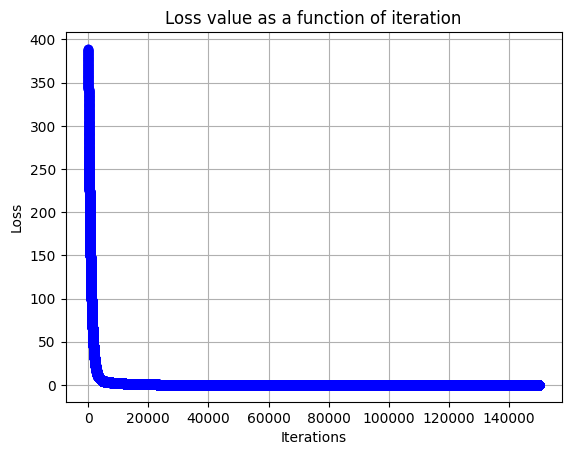

In [6]:
model = LinearRegression(training_features, training_labels.T , learning_rate=0.0001)
model.train(150000,True)

values = model.trainingLoss
x = np.arange(1, len(values) + 1)

plotLineGraph("Iterations", "Loss", "Loss value as a function of iteration",x,values)



#### Prediction Details

In [7]:
print("Predicted weights ", model.weight, " bias ", model.bias)

actual     = testing_labels            # full y-vector, shape (n_samples,)
predicted  = model.predict(testing_attributes)
loss       = model.calculateMseLoss(actual, predicted)

print("Prediction loss", model.calculateMseLoss(actual,model.predict(testing_attributes)))

Predicted weights  [[9.83687723]
 [3.23692746]]  bias  7.5177640448051575
Prediction loss 0.000998669624803221
